In [ ]:
#Extragem datele din fisierele .csv ale folderului "Resurse proiect ATM" intr-un singur fisier "DateExaminari.csv" si verificam
#daca avem valori lipsa

In [1]:
import os
import pandas as pd

# Specificăm directorul unde se află fișierele CSV
directory = '/workspaces/lab02-AI/Proiect_Mandibula/Resurse proiect ATM/'

# Scriem headerele în fișierul DateExaminari.csv
with open('DateExaminari.csv', 'w') as file:
    file.write('Imagine,Disfunctie\n')

# Utilizăm os.walk pentru a parcurge recursiv toate subdirectoarele
for root, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith('.csv'):
            filepath = os.path.join(root, filename)
            
            # Citim datele din fișierul CSV
            df_examinari = pd.read_csv(filepath, delimiter=',', header=0)
            
            # Verificăm valorile lipsă pentru fiecare coloană și le afișăm
            print(f"Valori lipsă pentru fiecare coloană în fișierul {filename}:")
            print(df_examinari.isna().sum())
            print()
            
            # Completăm valorile lipsă cu modulul fiecărei coloane
            df_filled = df_examinari.fillna(df_examinari.mode().iloc[0])
            df_filled.to_csv('DateExaminari.csv', mode='a', header=False, index=False)


Valori lipsă pentru fiecare coloană în fișierul P1-10S.csv:
Imagine       0
Disfunctie    0
dtype: int64

Valori lipsă pentru fiecare coloană în fișierul P1-10C.csv:
Imagine       0
Disfunctie    0
dtype: int64

Valori lipsă pentru fiecare coloană în fișierul P21-30.csv:
Imagine       0
Disfunctie    0
dtype: int64

Valori lipsă pentru fiecare coloană în fișierul P31-40.csv:
Imagine       0
Disfunctie    0
dtype: int64

Valori lipsă pentru fiecare coloană în fișierul P41-50.csv:
Imagine       0
Disfunctie    0
dtype: int64

Valori lipsă pentru fiecare coloană în fișierul P11-20.csv:
Imagine       0
Disfunctie    0
dtype: int64



In [ ]:
#Aflam marimea bazei noastre de date

In [3]:
import pandas as pd

df_examinari = pd.read_csv('DateExaminari.csv',delimiter=',',header=0)

n_of_rows_cols = df_examinari.shape

print('Avem ',n_of_rows_cols[0],' date in baza de date')


Avem  301  date in baza de date


In [ ]:
#Vizualizam repartia datelor in functie de categorie

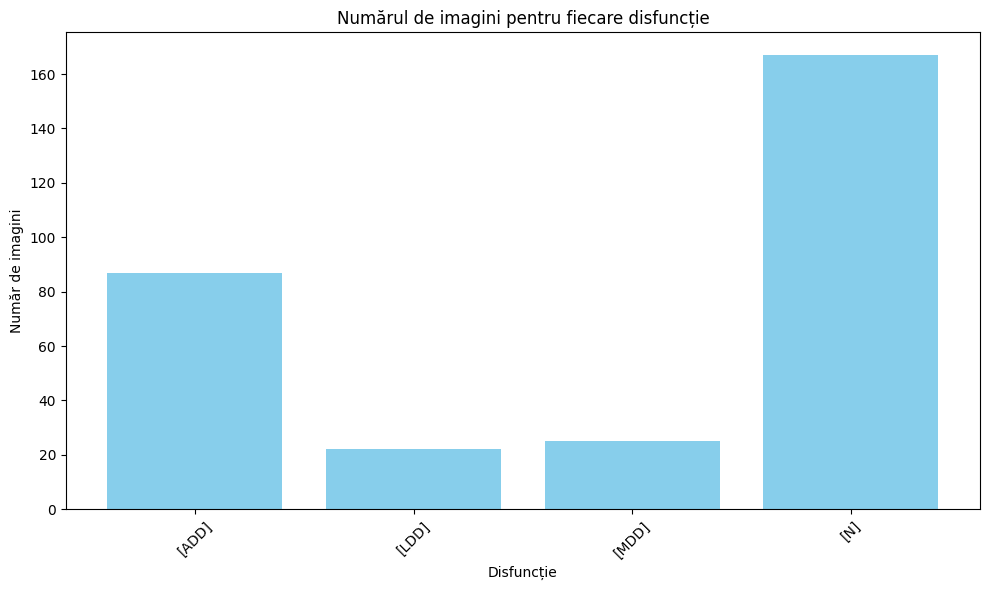

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Citim datele din fișierul CSV
df_examinari = pd.read_csv('DateExaminari.csv', delimiter=',', header=0)

# Calculăm numărul de imagini pentru fiecare categorie de disfuncție
df_counts = df_examinari.groupby('Disfunctie')['Imagine'].count().reset_index()
df_counts.columns = ['Disfunctie', 'NumarImagini']

# Creăm un grafic cu numărul de imagini pentru fiecare disfuncție
plt.figure(figsize=(10, 6))
plt.bar(df_counts['Disfunctie'], df_counts['NumarImagini'], color='skyblue')
plt.title('Numărul de imagini pentru fiecare disfuncție')
plt.xlabel('Disfuncție')
plt.ylabel('Număr de imagini')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
